In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [4]:
import quandl
quandl.ApiConfig.api_key = 'TH3VN_vB9cFBxKajbgi_'


In [5]:
Inflation_data = quandl.get("RATEINF/CPI_DEU", start_date="1991-01-31")

In [6]:
Inflation_data.tail(5)

,Value
Date,
2023-03-31,116.1
2023-04-30,116.6
2023-05-31,116.5
2023-06-30,116.8
2023-07-31,117.1


In [7]:
Inflation_data.reset_index(inplace=True)

In [8]:
Inflation_data.set_index('Date', inplace=True)

In [9]:
Inflation_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 391 entries, 1991-01-31 to 2023-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   391 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [10]:
Inflation_data 

,Value
Date,
1991-01-31,64.0
1991-02-28,64.3
1991-03-31,64.3
1991-04-30,64.5
1991-05-31,64.7
...,...
2023-03-31,116.1
2023-04-30,116.6
2023-05-31,116.5


In [11]:
Inflation_data['Inflation_Rate_prev_Month'] = Inflation_data['Value'].pct_change() * 100
Inflation_data['Inflation_Rate_prev_Month'] = Inflation_data['Inflation_Rate_prev_Month'].round(1)
Inflation_data.head()


,Value,Inflation_Rate_prev_Month
Date,,
1991-01-31,64.0,NaN
1991-02-28,64.3,0.5
1991-03-31,64.3,0.0
1991-04-30,64.5,0.3
1991-05-31,64.7,0.3


In [12]:
Inflation_data['Inflation_Rate_prev_Year'] = Inflation_data['Value'].pct_change(periods = 12) * 100
Inflation_data['Inflation_Rate_prev_Year'] = Inflation_data['Inflation_Rate_prev_Year'].round(1)
Inflation_data.tail(5)

,Value,Inflation_Rate_prev_Month,Inflation_Rate_prev_Year
Date,,,
2023-03-31,116.1,0.8,7.4
2023-04-30,116.6,0.4,7.2
2023-05-31,116.5,-0.1,6.1
2023-06-30,116.8,0.3,6.4
2023-07-31,117.1,0.3,6.2


In [13]:
Inflation_data.dropna(subset=['Inflation_Rate_prev_Year'], inplace=True)

In [14]:
#check wether data is stationary
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [15]:
check_stationarity(Inflation_data['Inflation_Rate_prev_Year'])

The series is stationary


/opt/homebrew/Caskroom/miniconda/base/envs/clustering_exercise/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


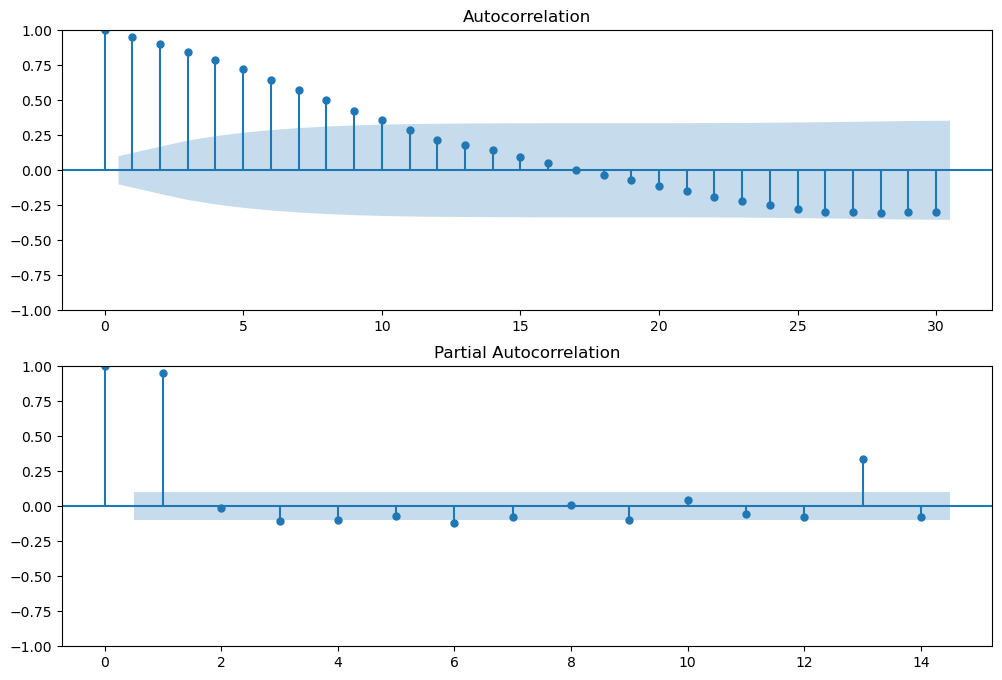

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(Inflation_data['Inflation_Rate_prev_Year'], lags=30, ax=ax1)
plot_pacf(Inflation_data['Inflation_Rate_prev_Year'], lags=14, ax=ax2)
plt.show()

In [17]:
model = sm.tsa.ARIMA(Inflation_data['Inflation_Rate_prev_Year'], order=(1, 0, 1))  
results = model.fit()
forecast_steps = 20*12
forecast_values = results.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted Inflation Rate:")
print(forecast_values.round(1).head(30))

Forecasted Inflation Rate:
2023-08-31    6.1
2023-09-30    6.0
2023-10-31    5.9
2023-11-30    5.7
2023-12-31    5.6
2024-01-31    5.5
2024-02-29    5.4
2024-03-31    5.3
2024-04-30    5.3
2024-05-31    5.2
2024-06-30    5.1
2024-07-31    5.0
2024-08-31    4.9
2024-09-30    4.8
2024-10-31    4.8
2024-11-30    4.7
2024-12-31    4.6
2025-01-31    4.5
2025-02-28    4.5
2025-03-31    4.4
2025-04-30    4.3
2025-05-31    4.3
2025-06-30    4.2
2025-07-31    4.2
2025-08-31    4.1
2025-09-30    4.1
2025-10-31    4.0
2025-11-30    4.0
2025-12-31    3.9
2026-01-31    3.9
Freq: M, Name: predicted_mean, dtype: float64


/opt/homebrew/Caskroom/miniconda/base/envs/clustering_exercise/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/clustering_exercise/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/clustering_exercise/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


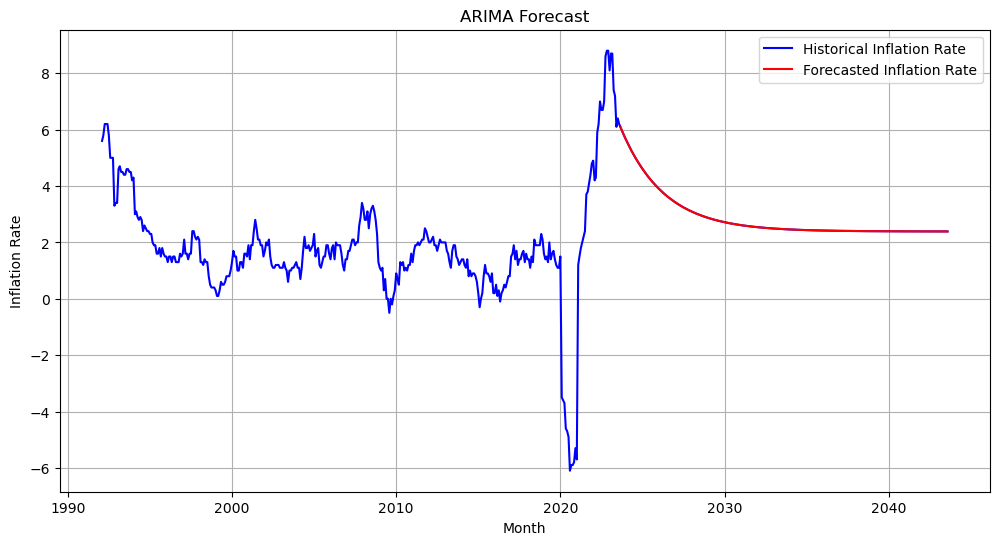

In [18]:

# Generate future dates for the forecast
future_dates = pd.date_range(start=Inflation_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Combine the historical and forecasted data for plotting
all_dates = Inflation_data.index.union(future_dates)
all_inflation = pd.concat([Inflation_data['Inflation_Rate_prev_Year'], pd.Series(forecast_values, index=future_dates)])

# Plot the forecasted inflation rate
plt.figure(figsize=(12, 6))
plt.plot(all_dates, all_inflation, label='Historical Inflation Rate', color='blue')
plt.plot(future_dates, forecast_values, label='Forecasted Inflation Rate', color='red') #adhkhas
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
model = sm.tsa.SARIMAX(Inflation_data['Inflation_Rate_prev_Year'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))  # Change order values accordingly
results = model.fit()
forecast_steps = 12
forecast_values = results.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted Inflation Rate:")
print(forecast_values.mean())

/opt/homebrew/Caskroom/miniconda/base/envs/clustering_exercise/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/clustering_exercise/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87165D+00    |proj g|=  3.51627D+00

At iterate    5    f=  7.16172D-01    |proj g|=  5.85745D-01

At iterate   10    f=  6.93765D-01    |proj g|=  4.63020D-02

At iterate   15    f=  6.59864D-01    |proj g|=  1.90780D-02

At iterate   20    f=  6.51500D-01    |proj g|=  8.59884D-03

At iterate   25    f=  6.50207D-01    |proj g|=  9.09145D-03

At iterate   30    f=  6.50132D-01    |proj g|=  6.51904D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

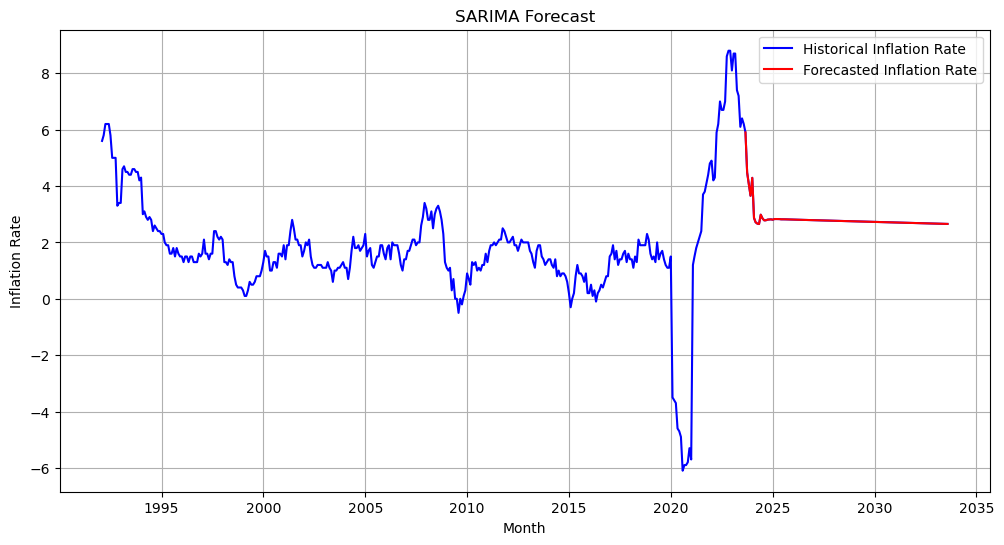

In [20]:
# Generate future dates for the forecast
future_dates = pd.date_range(start=Inflation_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Combine the historical and forecasted data for plotting
all_dates = Inflation_data.index.union(future_dates)
all_inflation = pd.concat([Inflation_data['Inflation_Rate_prev_Year'], pd.Series(forecast_values, index=future_dates)])

# Plot the forecasted inflation rate
plt.figure(figsize=(12, 6))
plt.plot(all_dates, all_inflation, label='Historical Inflation Rate', color='blue')
plt.plot(future_dates, forecast_values, label='Forecasted Inflation Rate', color='red')
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
100000 *(1-0.025)**(30)

46788.42982793399